In [2]:
import pandas as  pd

In [3]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\codes\python\GenAI\Pipelines\dataset\IMDB Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## we will work on smaller extract of a dataset

In [5]:
df = df.head(500)

## Lower Case

In [6]:
# lower case
df["review"] = df["review"].str.lower()

In [7]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


## Removal HTML Tags

In [8]:
import re
def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [9]:
remove_html(df['review'][1])

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

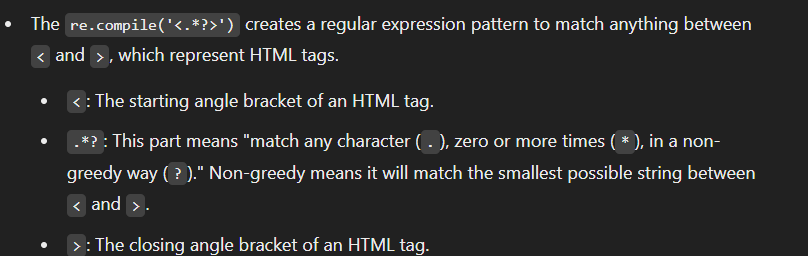

## Remove URL

In [10]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [11]:
text = "hello the dataset link is  https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download"
remove_url(text=text)

'hello the dataset link is  '

## Handling Punctuation

In [12]:
import string
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuation(text):
    for char in exclude:
        text = text.replace(char,"")
    return text

In [14]:
text = "string is, a great data structure , it's importance can be seen a lot of the times"
remove_punctuation(text=text)

'string is a great data structure  its importance can be seen a lot of the times'

In [15]:
df["review"] = df["review"].apply(remove_punctuation)

## Chat Conversation Handle

In [16]:
chat_handle = {
    "FYI": "For Your Information",
    "ASAP": "As Soon As Possible",
    "BRB": "Be Right Back",
    "BTW": "By The Way",
    "OMG": "Oh My God",
    "IMO": "In My Opinion",
    "LOL": "Laugh Out Loud",
    "TTYL": "Talk To You Later",
    "GTG": "Got To Go",
    "TTYT": "Talk To You Tomorrow",
    "IDK": "I Don't Know",
    "TMI": "Too Much Information",
    "IMHO": "In My Humble Opinion",
    "ICYMI": "In Case You Missed It",
    "AFAIK": "As Far As I Know",
    "BTW": "By The Way",
    "FAQ": "Frequently Asked Questions",
    "TGIF": "Thank God It's Friday",
    "FYA": "For Your Action",
    "ICYMI": "In Case You Missed It",
    'AFK':'Away From Keyboard',
}

In [17]:
def chat_handling(text):
    new_text = []
    for word in text.split():
        if word.upper() in chat_handle:
            new_text.append(chat_handle[word.upper()])
        else:
            new_text.append(word)
    return " ".join(new_text)

In [18]:
text = "afaik he is not a good man"
chat_handling(text)

'As Far As I Know he is not a good man'

## Incorrect Text Handling

In [19]:
from textblob import TextBlob

In [20]:
text = "He is not goood maan , he is too dummb"
textBlb = TextBlob(text)
print(textBlb.correct().string)

He is not good man , he is too dumb


## Stopwords

In [23]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append("")
        else:
            new_text.append(word)
    x = new_text[:] # makes a shallow copy of the new_text
    new_text.clear()
    return " ".join(x)

In [26]:
text = "Ram is great at strategy making ,this wasn't your plan , this was his plan "
remove_stopwords(text)

'Ram  great  strategy making ,this   plan ,    plan'

In [27]:
import swifter
df["review"] = df["review"].swifter.apply(remove_stopwords)

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

## Remove emojis

In [28]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [29]:
df['review'] = df['review'].swifter.apply(remove_emoji)

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

In [30]:
remove_emoji("the food is great ❤️")

'the food is great '

In [31]:
import emoji
print(emoji.demojize("Food is ❤️"))

Food is :red_heart:


## Tokenization

In [32]:
from nltk.tokenize  import sent_tokenize,word_tokenize
word = "i am a great person"
word_tokenize(word)

['i', 'am', 'a', 'great', 'person']

In [33]:
sentence = "i am a great person . he is a bad person"
sent_tokenize(sentence)

['i am a great person .', 'he is a bad person']

## Stemmer

In [34]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemmer(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [35]:
text = "Walked walking walks walk"
stemmer(text)

'walk walk walk walk'

## Lemmatization

In [37]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
wordnet_lemmatizer = WordNetLemmatizer()
punctuations  = string.punctuation
def lemmatizer(text):
    sentence_level = nltk.word_tokenize(text)
    for word in sentence_level:
        if word in punctuations:
            sentence_level.remove(word)
    lemmatized_sentence = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in sentence_level]
    return ' '.join(lemmatized_sentence)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [38]:
df['review'] = df['review'].swifter.apply(lemmatizer)

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

In [39]:
df['review']

0      one reviewers mention watch 1 oz episode youll...
1      wonderful little production br br film techniq...
2      think wonderful way spend time hot summer week...
3      basically theres family little boy jake think ...
4      petter matteis love time money visually stun f...
                             ...                        
495    american nightmare officially tie opinion pat ...
496    first say love book animal farm read 9th grade...
497    movie extremely bore laugh time decide rent no...
498    disgust movie wasnt graphic sex scenes ruin im...
499    joyous world create us pixars bug life immerse...
Name: review, Length: 500, dtype: object

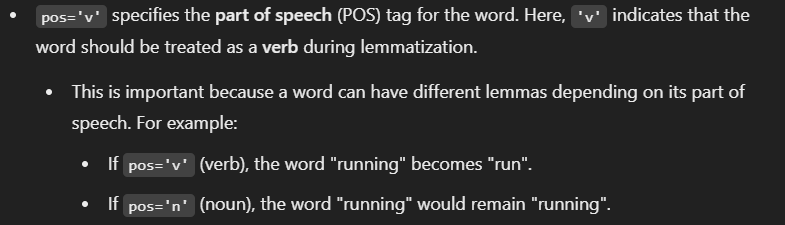